# Traitement de données statistiques avec pandas

## Charger des données

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("../Formation-URFIST-Lyon-2023-automne/data/SOSP_Export_base de données diffusable.csv")

In [11]:
df.shape

(1089, 131)

In [12]:
type(df)

pandas.core.frame.DataFrame

## Rapidement, le tableau pandas

In [19]:
df_exemple = pd.DataFrame([["A",1],["B",2],["C",3]],columns = ["colonne 1","colonne 2"])

In [20]:
df_exemple

,colonne 1,colonne 2
0,A,1
1,B,2
2,C,3


In [21]:
df_exemple.columns

Index(['colonne 1', 'colonne 2'], dtype='object')

In [23]:
list(df_exemple.index)

[0, 1, 2]

In [24]:
df_exemple["colonne 1"]

0    A
1    B
2    C
Name: colonne 1, dtype: object

In [25]:
df_exemple.loc[1]

colonne 1    B
colonne 2    2
Name: 1, dtype: object

In [26]:
df_exemple.loc[1,"colonne 1"]

'B'

## Manipuler un tableau

In [28]:
df.columns

Index(['Id', 'contexte_travail', 'fonction_recherche', 'statut_professionnel',
       'statut_professionnel_Autre', 'annee_premiere_publi',
       'Systeme_exploitation', 'Usage_telephone_mobile',
       'Outils_gestion_travail_av_confinement_visioconférence',
       'Outils_gestion_travail_av_confinement_planification_RDV',
       ...
       'Souhait_partage_donnees_produites_discipline',
       'Souhait_partage_donnees_produites_pays_continent',
       'Souhait_partage_donnees_produites_domaine_economique',
       'Souhait_partage_donnees_produites_secteur_associatif',
       'Souhait_partage_donnees_produites_sans_restriction',
       'compatibilite_diffusion_partage', 'evolutions_pratiques_numeriques',
       'sexe', 'disciplines_9niv', 'annee_de_naissance-recod10niv'],
      dtype='object', length=131)

In [33]:
df["statut_professionnel"].unique()

array(['fonctionnaire ou assimilé', 'en CDI', 'en CDD',
       'travailleur indépendant', 'contrat doctoral', 'retraité',
       'post-doc', 'doctorant non financé',
       'professeur / chercheur émérite', 'chômage', 'autre', 'vacataire'],
      dtype=object)

In [43]:
round(100*df["statut_professionnel"].value_counts(normalize=True),2)

statut_professionnel
fonctionnaire ou assimilé         65.29
en CDI                            10.01
contrat doctoral                   9.09
en CDD                             8.72
post-doc                           2.75
travailleur indépendant            1.84
doctorant non financé              0.64
chômage                            0.55
retraité                           0.46
professeur / chercheur émérite     0.28
autre                              0.18
vacataire                          0.18
Name: proportion, dtype: float64

In [37]:
(2020-df["annee_premiere_publi"]).mean()

15.969696969696969

In [38]:
(2020-df["annee_premiere_publi"]).std()

11.362671081996833

In [39]:
(2020-df["annee_premiere_publi"]).describe()

count    1089.000000
mean       15.969697
std        11.362671
min         0.000000
25%         6.000000
50%        15.000000
75%        24.000000
max        52.000000
Name: annee_premiere_publi, dtype: float64

<Axes: ylabel='Frequency'>

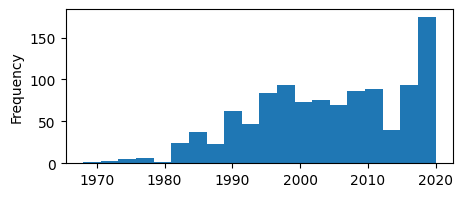

In [46]:
df["annee_premiere_publi"].plot(kind="hist",bins=20,figsize=(5,2))

<Axes: ylabel='statut_professionnel'>

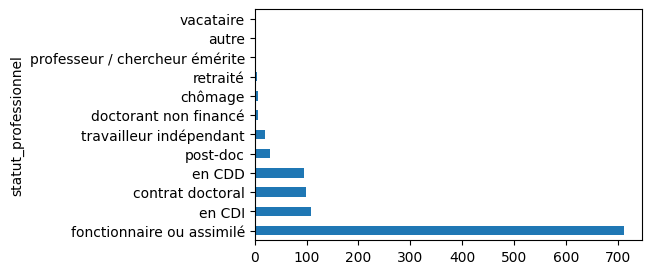

In [50]:
df["statut_professionnel"].value_counts().plot(kind="barh",figsize=(5,3))

## Transformer les données

In [57]:
df["statut_professionnel"].unique()

array(['fonctionnaire ou assimilé', 'en CDI', 'en CDD',
       'travailleur indépendant', 'contrat doctoral', 'retraité',
       'post-doc', 'doctorant non financé',
       'professeur / chercheur émérite', 'chômage', 'autre', 'vacataire'],
      dtype=object)

In [58]:
reco = {'fonctionnaire ou assimilé':"CDI", 
        'en CDI':"CDI", 'en CDD':"précaire",
       'travailleur indépendant':"autre", 
        'contrat doctoral':"précaire", 'retraité':"autre",
       'post-doc':"précaire",
        'doctorant non financé':"précaire",
       'professeur / chercheur émérite':"autre", 'chômage':"précaire", 'autre':"autre", 
        'vacataire':"précaire"}

df["statut_professionnel_reco"] = df["statut_professionnel"].replace(reco)

In [59]:
df["statut_professionnel_reco"].value_counts()

statut_professionnel_reco
CDI         820
précaire    239
autre        30
Name: count, dtype: int64

## recoder les données numériques

In [66]:
df["annee_premiere_publi_Q"] = pd.qcut(df["annee_premiere_publi"],4)

In [67]:
df.to_excel("résultats.xlsx")

## Une base de données

In [62]:
filtre = (df["statut_professionnel_reco"] == "précaire")

In [64]:
df[filtre].shape

(239, 132)